In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

### Exercise 5
A trombone player can play a glissando by extending the trombone slide while blowing continuously. As the slide extends, the total length of the tube gets longer, and the resulting pitch is inversely proportional to length. Assuming that the player moves the slide at a constant speed, how does frequency vary with time?

Write a class called TromboneGliss that extends Chirp and provides evaluate. Make a wave that simulates a trombone glissando from F3 down to C3 and back up to F3. C3 is 262 Hz; F3 is 349 Hz.

Plot a spectrogram of the resulting wave. Is a trombone glissando more like a linear or exponential chirp?

長號演奏者可以通過在連續吹奏的同時延長長號滑動來演奏滑音。 隨著滑塊的延伸，管的總長度會變長，並且最終的螺距與長度成反比。 假設播放器以恆定速度移動幻燈片，頻率如何隨時間變化？

編寫一個名為TromboneGliss的類，該類擴展了Chirp並提供評估。 進行模擬從F3到C3再回到F3的長號glissando的波浪。 C3為262 Hz; F3為349 Hz。

繪製產生的波的頻譜圖。 長號滑翔傘更像是線性或指數chi嗎？

In [2]:
class TromboneGliss(thinkdsp.Chirp):
    """Represents a trombone-like signal with varying frequency."""
    
    def evaluate(self, ts):
        """Evaluates the signal at the given times.

        ts: float array of times
        
        returns: float wave array
        """
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts)-1)
        freqs = 1 / lengths
        return self._evaluate(ts, freqs)

Here's the first part of the wave:

這是浪潮的第一部分：

In [3]:
low=  330 #262
high= 440 #349
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

And the second part:

第二部分：

In [4]:
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

Putting them together:

將它們放在一起：

In [5]:
wave = wave1 | wave2  | wave2 | wave1 | wave1 | wave2  | wave2 | wave1
wave.make_audio()

#wave??

- wave 物件串接(concatenate)，使用 `__or__` 運算符： `|`

```python
class Wave:
    def __or__(self, other):
        """Concatenates two waves.

        other: Wave

        returns: new Wave
        """
        if self.framerate != other.framerate:
            raise ValueError("Wave.__or__: framerates do not agree")

        ys = np.concatenate((self.ys, other.ys))
        # ts = np.arange(len(ys)) / self.framerate
        return Wave(ys, framerate=self.framerate)
```


Here's the spectrogram:

這是頻譜圖：

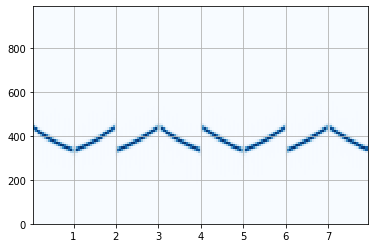

In [47]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)